In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Netflix/Copy of combined_data_1.txt',header = None, names = ['Cust_Id','Rating'], usecols = [0,1] )
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
netflix_dataset['Rating']= netflix_dataset['Rating'].astype(float)

In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
#To calculate no. of movies in the dataset
movie_count = netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
movie_count = netflix_dataset.isnull().sum()[1]
# 1 is the index of the count of null values in the ratings column
movie_count

4499

In [ ]:
# get the customer count with nan values
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count["Rating"]

In [ ]:
movie_count

4499

In [ ]:
# to calculate how many customers we are having in the dataset
customer_count = netflix_dataset['Cust_Id'].nunique()

In [ ]:
customer_count #this also include unique movie id's

475257

In [ ]:
#without nan values
customer_count = customer_count - movie_count
customer_count

470758

In [ ]:
netflix_dataset['Cust_Id'].count() # no. of times a customer has given ratings.

24058263

In [ ]:
#get the total no. of ratings given by a customer.
rating_count = netflix_dataset['Cust_Id'].count() - movie_count
rating_count

24053764

In [ ]:
p = netflix_dataset.groupby('Rating')['Rating'].count()
p

Rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: Rating, dtype: int64

In [ ]:
p = pd.DataFrame(p)
p

,Rating
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [ ]:
p.rename(columns = {'Rating':'Count'}, inplace = True)
p

,Count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [ ]:
p.sort_values(by = 'Rating', ascending = False)

,Count
Rating,
5.0,5506583
4.0,8085741
3.0,6904181
2.0,2439073
1.0,1118186


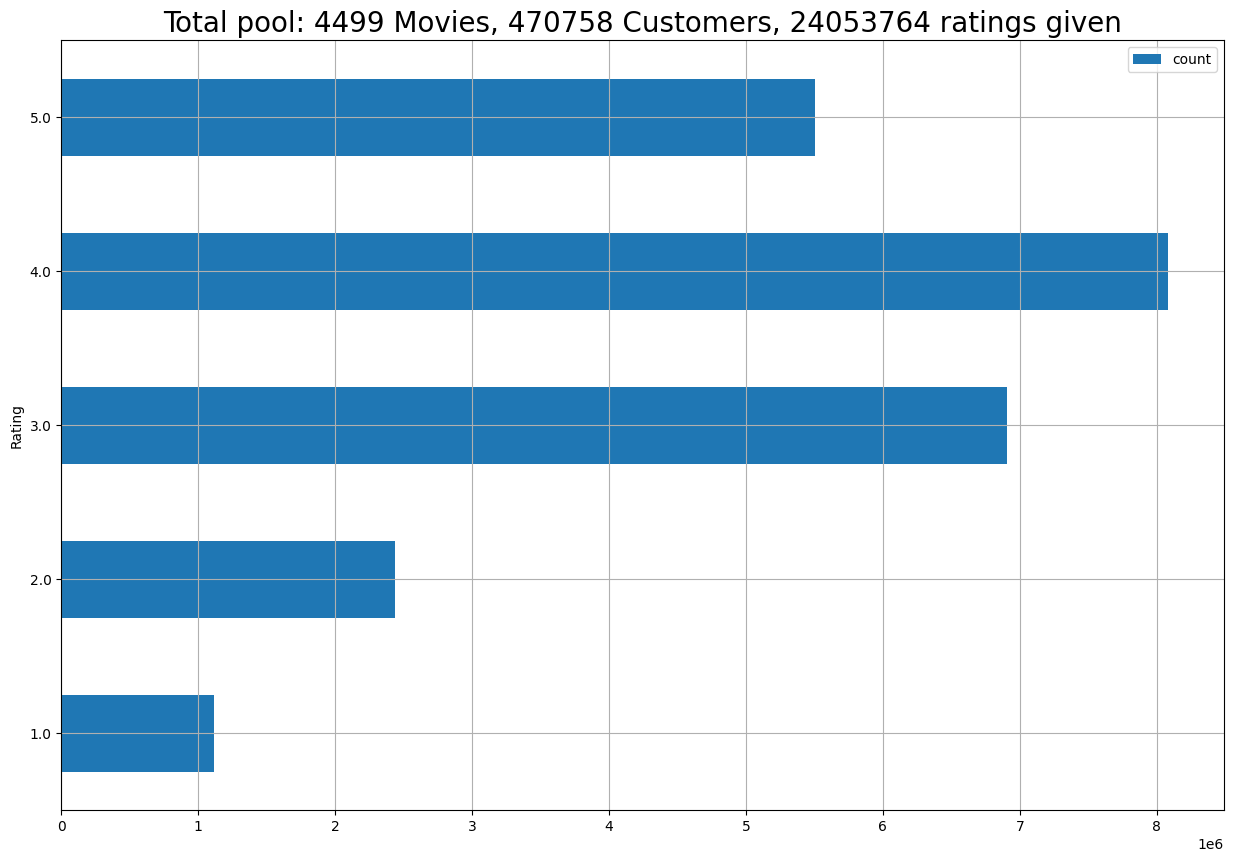

In [ ]:
# plotting values
ax = stars.plot(kind = 'barh', figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize = 20)
plt.grid(True)

In [ ]:
# add another column that will have movie_ids
# first of all we will be calculating how many null values we are having in the ratings column
df_nan = pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [ ]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_nan = df_nan[df_nan['Rating'] ==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan.shape

(4499, 1)

In [ ]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [ ]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [ ]:
# now we will reset the index as the column
df_nan = df_nan.reset_index()

In [ ]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
df_nan['index'][:-1] # will extract all the records from the index column except for the last index -- 4498

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][1:] # this syntax will extract records from the index column from the 1st index

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
np.full((2,4), '2.0') # working of full function

array([['2.0', '2.0', '2.0', '2.0'],
       ['2.0', '2.0', '2.0', '2.0']], dtype='<U3')

In [ ]:
# working
x = zip(df_nan['index'][1:], df_nan['index'][:-1])
x

In [ ]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [ ]:
temp = np.full((1,547),1)
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# now we will create a numpy array that will contain 1 from value 0 to 547,2 from 548 to 693 and so on
movie_np = []
movie_id = 1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp  = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id+=1

# account for last record and corresponding length
# numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id) #movie id will be 4499
movie_np= np.append(movie_np, last_record)

In [ ]:
netflix_dataset= netflix_dataset[pd.notnull(netflix_dataset['Rating'])]

netflix_dataset['Movie_Id']= movie_np.astype(int)
netflix_dataset['Cust_Id']= netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#benchmark
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [ ]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [ ]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [ ]:
drop_movie_list= dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [ ]:
len(drop_movie_list)

3149

In [ ]:
#now we will remove all the users that are in-active
dataset_cust_summary= netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [ ]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

In [ ]:
len(drop_cust_list)

327300

In [ ]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [ ]:
netflix_dataset['Movie_Id'].isin(drop_movie_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie_Id, Length: 24053764, dtype: bool

In [ ]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
import pandas as pd

In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix/movie_titles _1_ (2).csv", encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name'])
df_title.set_index('Movie_Id', inplace=True)

In [ ]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [ ]:
df_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [ ]:
!pip install scikit-surprise

In [ ]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
#!pip install scikit-surprise

In [ ]:
#help us to read the dataset for svd algo
reader= Reader()

In [ ]:
#we only work with top 100k rows for quick runtime
data= Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:10000], reader)

In [ ]:
data

In [ ]:
model=SVD()
# cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3)
# for 1st fold-1,2,3,4,5

In [ ]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

{'test_rmse': array([1.26742045, 1.26723212, 1.24817245, 1.24083908]),
 'test_mae': array([1.04251102, 1.05278033, 1.02945106, 1.0168158 ]),
 'fit_time': (0.1965477466583252,
  0.45670580863952637,
  0.3553760051727295,
  0.33009886741638184),
 'test_time': (0.03323006629943848,
  0.037029266357421875,
  0.016435623168945312,
  0.023815631866455078)}

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)

In [ ]:
#so first we take user 1331154 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_1331154=netflix_dataset[(netflix_dataset['Cust_Id'] ==1331154)& (netflix_dataset['Rating']==5)]
dataset_1331154

,Cust_Id,Rating,Movie_Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [ ]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_1331154=df_title.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_1331154=user_1331154.reset_index()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-85-701ece779a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.930907
7,8,2004.0,What the #$*! Do We Know!?,3.621074
15,16,1996.0,Screamers,3.286663
16,17,2005.0,7 Seconds,3.286663
17,18,1994.0,Immortal Beloved,3.286663
...,...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.286663
17765,17767,2004.0,Fidel Castro: American Experience,3.286663
17766,17768,2000.0,Epoch,3.286663
17767,17769,2003.0,The Company,3.286663


In [ ]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
print(user_1331154)

       Movie_Id    Year                                Name  Estimate_Score
2             3  1997.0                           Character        3.930907
7             8  2004.0          What the #$*! Do We Know!?        3.621074
14112     14114  1972.0                Emergency!: Season 1        3.286663
12886     12888  1993.0                              Bopha!        3.286663
12888     12890  1976.0                              Carrie        3.286663
...         ...     ...                                 ...             ...
8025       8027  1980.0                              Gloria        3.286663
8026       8028  1993.0                    White Lotus Cult        3.286663
8027       8029  2004.0  Dora the Explorer: Catch the Stars        3.286663
8028       8030  2004.0                              Denied        3.286663
17768     17770  2003.0                        Alien Hunter        3.286663

[14620 rows x 4 columns]
